In [5]:
import h5py
import numpy
import pylab
import matplotlib
import re
import sympy
import glob
sympy.init_printing()

<IPython.core.display.Javascript object>


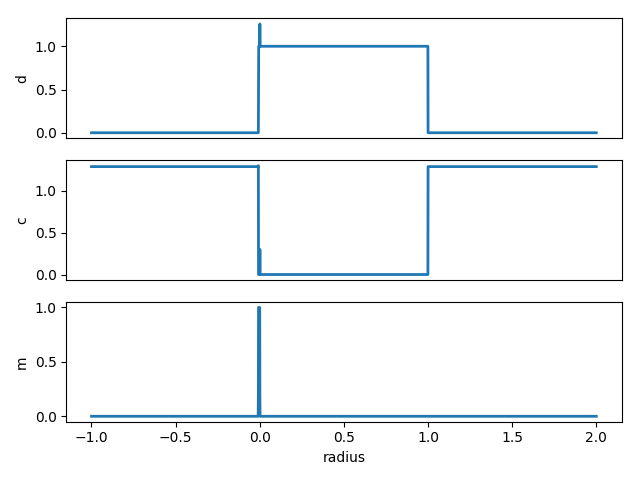

In [9]:
with h5py.File('../one_dimensional_crater/var_40/snapshot_87.h5','r') as f:
    d_list = numpy.array(f['density'])
    p_list = numpy.array(f['pressure'])
    u_list = numpy.array(f['x_velocity'])
    x_list = numpy.array(f['grid'])
    
c_list = numpy.sqrt((5./3.)*p_list/d_list)
    
%matplotlib notebook
pylab.subplot(311)
pylab.plot(x_list, d_list, linewidth=2)
pylab.ylabel('d')
pylab.xticks([], [])

pylab.subplot(312)
pylab.plot(x_list, c_list, linewidth=2)
pylab.ylabel('c')
pylab.xticks([], [])

pylab.subplot(313)
pylab.plot(x_list, u_list, linewidth=2)
pylab.ylabel('m')
pylab.xlabel('radius')
pylab.tight_layout()
pass

<IPython.core.display.Javascript object>


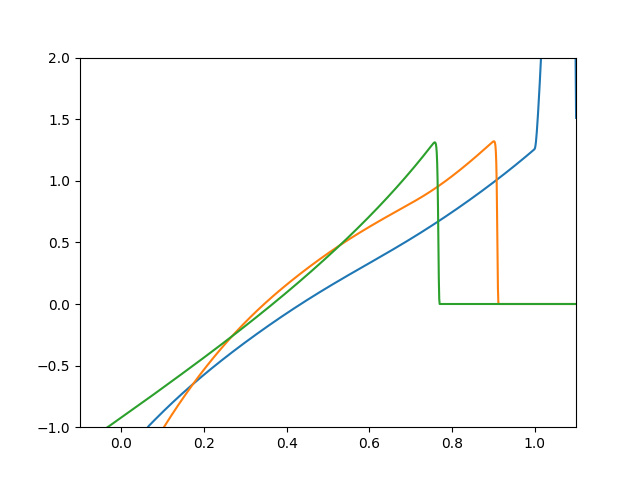

In [3]:
with h5py.File('var_16/snapshot_21.h5','r') as f:
    d_list = numpy.array(f['density'])
    p_list = numpy.array(f['pressure'])
    u_list = numpy.array(f['x_velocity'])
    x_list = numpy.array(f['grid'])
    
c_list = numpy.sqrt((5./3.)*p_list/d_list)
    
%matplotlib notebook
pylab.plot(x_list, u_list/c_list)

with h5py.File('var_12/snapshot_15.h5','r') as f:
    d_list = numpy.array(f['density'])
    p_list = numpy.array(f['pressure'])
    u_list = numpy.array(f['x_velocity'])
    x_list = numpy.array(f['grid'])
    
c_list = numpy.sqrt((5./3.)*p_list/d_list)
    
pylab.plot(x_list, u_list/c_list)

with h5py.File('var_40/snapshot_62.h5','r') as f:
    d_list = numpy.array(f['density'])
    p_list = numpy.array(f['pressure'])
    u_list = numpy.array(f['x_velocity'])
    x_list = numpy.array(f['grid'])
    
c_list = numpy.sqrt((5./3.)*p_list/d_list)
    
pylab.plot(x_list, u_list/c_list)


pylab.xlim((-0.1,1.1))
pylab.ylim((-1,2))

In [4]:
def sample_velocity_at(fname, pos):
    with h5py.File(fname,'r') as f:
        x_list = numpy.array(f['grid'])
        v_list = numpy.array(f['x_velocity'])
    return numpy.interp(pos, x_list, v_list)
sample_velocity_at('var_0/snapshot_100.h5', 0.99)

IOError: Unable to open file (Unable to open file: name = 'var_0/snapshot_100.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

<IPython.core.display.Javascript object>


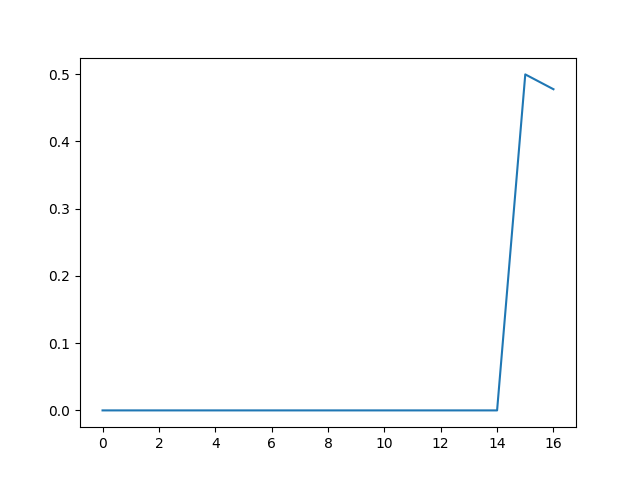

In [5]:
def extract_index_from_filename(fname):
    return int(re.search(r'_(\d+).', fname).group(1))
fname_list = sorted(glob.glob('snapshot_*.h5'),
                    key=extract_index_from_filename)
v_sample_list = [sample_velocity_at(fname,0.99) for fname in fname_list]
%matplotlib notebook
pylab.plot(v_sample_list)

Parameter survey

<IPython.core.display.Javascript object>


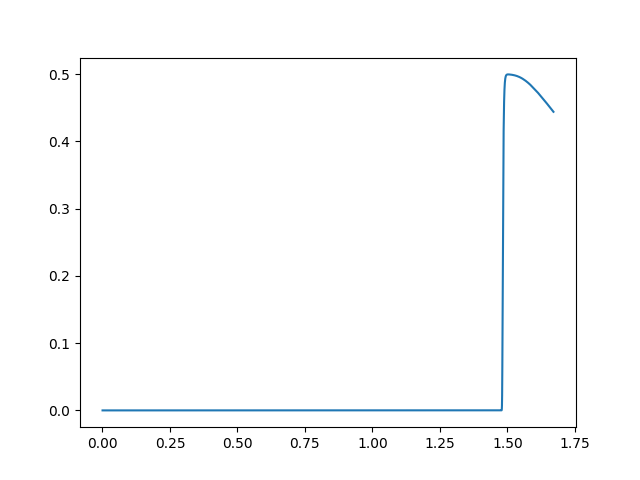

In [6]:
raw_data = numpy.loadtxt('velocity_history.txt')
%matplotlib notebook
pylab.plot(raw_data.T[0], raw_data.T[1])

In [7]:
matplotlib.rcParams.update({'font.size': 22})
dirlist = sorted(glob.glob('var_*'),
                 key=extract_dir_index)
iw_list = numpy.array([numpy.loadtxt(dirname+'/impactor_width.txt') for dirname in dirlist])
v_breakout = numpy.array([numpy.max(numpy.loadtxt(dirname+'/velocity_history.txt').T[1])
                          for dirname in dirlist])
mask = v_breakout<0.3
fit_data = numpy.polyfit(numpy.log(iw_list[mask]),
                        numpy.log(v_breakout[mask]),
                        1)
print(fit_data)
%matplotlib notebook
pylab.loglog(iw_list, v_breakout, '.')
pylab.loglog(iw_list, numpy.exp(numpy.polyval(fit_data, numpy.log(iw_list))))
pylab.xlabel('Projective / Target width')
pylab.ylabel('Breakout / impact velocity')
pylab.tight_layout()
pass

NameError: name 'extract_dir_index' is not defined

<IPython.core.display.Javascript object>


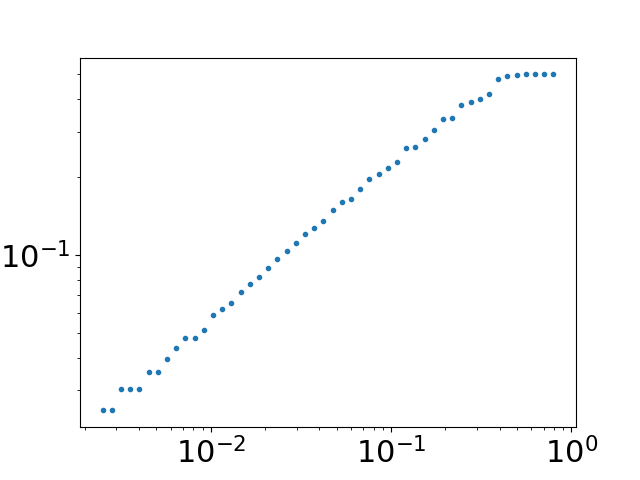

In [8]:
def extract_dir_index(dirname):
    return int(re.search(r'var_(\d+)',dirname).group(1))
dirlist = sorted(glob.glob('var_*'),
                 key=extract_dir_index)
v_breakout = []
iw_list = []
for dirname in dirlist:
    iw_list.append(numpy.loadtxt(dirname+'/impactor_width.txt')) 
    v_breakout.append(numpy.max([sample_velocity_at(fname,0.99) for fname in glob.glob(dirname+'/snapshot_*.h5')]))
%matplotlib notebook
pylab.loglog(iw_list, v_breakout,'.')